In [3]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

In [4]:
import os 
import numpy as np 
from keras.preprocessing import image
from keras.models import load_model

import cv2 #pip install opencv-python

In [ ]:
# dATASET from https://medium.com/ai-saturdays/ai-saturday-bangalore-chapter-trash-classifier-tutorial-8e6b3c6860c5

In [49]:
train_path = '/home/yl/donkey/keras_tutorial/dataset-resized/dataset-resized/'
labels = os.listdir('/home/yl/donkey/keras_tutorial/dataset-resized/dataset-resized/cardboard')
# labels = ['cardboard', 'glass']
print (labels)

['cardboard354.jpg', 'cardboard259.jpg', 'cardboard36.jpg', 'cardboard184.jpg', 'cardboard312.jpg', 'cardboard39.jpg', 'cardboard370.jpg', 'cardboard62.jpg', 'cardboard126.jpg', 'cardboard134.jpg', 'cardboard322.jpg', 'cardboard374.jpg', 'cardboard107.jpg', 'cardboard294.jpg', 'cardboard97.jpg', 'cardboard188.jpg', 'cardboard241.jpg', 'cardboard389.jpg', 'cardboard317.jpg', 'cardboard359.jpg', 'cardboard19.jpg', 'cardboard279.jpg', 'cardboard390.jpg', 'cardboard246.jpg', 'cardboard277.jpg', 'cardboard156.jpg', 'cardboard208.jpg', 'cardboard202.jpg', 'cardboard291.jpg', 'cardboard263.jpg', 'cardboard395.jpg', 'cardboard197.jpg', 'cardboard281.jpg', 'cardboard123.jpg', 'cardboard392.jpg', 'cardboard289.jpg', 'cardboard337.jpg', 'cardboard109.jpg', 'cardboard346.jpg', 'cardboard143.jpg', 'cardboard101.jpg', 'cardboard35.jpg', 'cardboard141.jpg', 'cardboard11.jpg', 'cardboard386.jpg', 'cardboard400.jpg', 'cardboard366.jpg', 'cardboard364.jpg', 'cardboard276.jpg', 'cardboard131.jpg', 'cardb

In [13]:
print(train_path+labels[0])

/home/yl/donkey/keras_tutorial/dataset-resized/dataset-resized/cardboard


In [23]:
# load training data
data_train = []
train_data = []
IMG_SIZE = 50 # TRY DIFFERENT SIZES

for label in labels:
    train_data_files=os.listdir(train_path+label)
    # if data are in form of images
    for sample in train_data_files:
        img_path = train_path+label+'/'+sample
#         x = image.load_img(img_path)
        img_array = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        # preprocessing if required
#         label_num = labels.index(label)
        data_train.append([new_array, label])
 

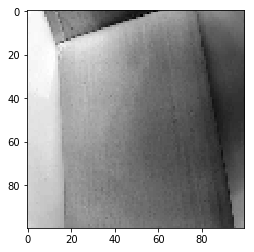

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(data_train[0][0], cmap='gray')
plt.show()

In [20]:
import random

random.shuffle(data_train)

In [22]:
for sample in data_train[:10]:
    print(sample[1])

glass
cardboard
cardboard
glass
glass
cardboard
cardboard
glass
cardboard
cardboard


In [34]:
# model to train with
X = []
y = []

for image, label in data_train:
    X.append(image)
    y.append(labels.index(label))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [35]:
# save dataset
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [36]:
#read from pickle
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

In [50]:
print(X)

[[[[0.00346021]
   [0.00342945]
   [0.00341407]
   ...
   [0.00266052]
   [0.00262976]
   [0.00262976]]

  [[0.00339869]
   [0.00341407]
   [0.00341407]
   ...
   [0.00266052]
   [0.00261438]
   [0.002599  ]]

  [[0.00339869]
   [0.00341407]
   [0.00341407]
   ...
   [0.00262976]
   [0.00261438]
   [0.00255286]]

  ...

  [[0.00313725]
   [0.00312188]
   [0.0031065 ]
   ...
   [0.00266052]
   [0.00272203]
   [0.00276817]]

  [[0.00318339]
   [0.00312188]
   [0.0031065 ]
   ...
   [0.00247597]
   [0.00273741]
   [0.00279892]]

  [[0.00321415]
   [0.00313725]
   [0.0031065 ]
   ...
   [0.00218378]
   [0.00275279]
   [0.00284506]]]


 [[[0.00298347]
   [0.00287582]
   [0.00290657]
   ...
   [0.00232218]
   [0.00232218]
   [0.00233756]]

  [[0.00284506]
   [0.00295271]
   [0.00292195]
   ...
   [0.00235294]
   [0.00215302]
   [0.00224529]]

  [[0.00296809]
   [0.00304498]
   [0.00292195]
   ...
   [0.00224529]
   [0.00226067]
   [0.00219915]]

  ...

  [[0.00175317]
   [0.00239908]
   [0.0

In [39]:
# training on CNN

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0 # normalise

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.fit(X, y, epochs=3, validation_split=0.3)

Train on 632 samples, validate on 272 samples
Epoch 1/3
632/632 [==============================] - 34s 54ms/step - loss: 0.6851 - acc: 0.6076 - val_loss: 0.8012 - val_acc: 0.0000e+00
Epoch 2/3
632/632 [==============================] - 29s 45ms/step - loss: 0.6612 - acc: 0.6377 - val_loss: 1.0065 - val_acc: 0.0000e+00
Epoch 3/3
632/632 [==============================] - 28s 45ms/step - loss: 0.6575 - acc: 0.6377 - val_loss: 1.0086 - val_acc: 0.0000e+00
